In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 8)

#read the data
food_consumption = pd.read_csv('food_consumption.csv', index_col=0)
food_consumption.head()

print (food_consumption)


         country food_category  consumption  co2_emission
1      Argentina          pork        10.51         37.20
2      Argentina       poultry        38.66         41.53
3      Argentina          beef        55.48       1712.00
4      Argentina     lamb_goat         1.56         54.63
5      Argentina          fish         4.36          6.96
...          ...           ...          ...           ...
1426  Bangladesh         dairy        21.91         31.21
1427  Bangladesh         wheat        17.47          3.33
1428  Bangladesh          rice       171.73        219.76
1429  Bangladesh      soybeans         0.61          0.27
1430  Bangladesh          nuts         0.72          1.27

[1430 rows x 4 columns]


In [5]:
print ('_____________________________________________________________________')
print ('Filter for Belgium')
print ('_____________________________________________________________________')

#filter for Belgium
be_consumption = food_consumption[food_consumption['country'] == 'Belgium']
print (be_consumption)

_____________________________________________________________________
Filter for Belgium
_____________________________________________________________________
     country food_category  consumption  co2_emission
397  Belgium          pork        38.65        136.80
398  Belgium       poultry        12.20         13.11
399  Belgium          beef        15.63        482.31
400  Belgium     lamb_goat         1.32         46.23
401  Belgium          fish        18.97         30.29
402  Belgium          eggs        12.59         11.57
403  Belgium         dairy       236.19        336.43
404  Belgium         wheat       111.91         21.34
405  Belgium          rice         8.61         11.02
406  Belgium      soybeans         0.07          0.03
407  Belgium          nuts         7.32         12.96


In [6]:
print ('_____________________________________________________________________')
print ('Filter for USA')
print ('_____________________________________________________________________')
# Filter for USA
usa_consumption = food_consumption[food_consumption['country'] == 'USA']
print (usa_consumption)
print ('_____________________________________________________________________')

_____________________________________________________________________
Filter for USA
_____________________________________________________________________
   country food_category  consumption  co2_emission
56     USA          pork        27.64         97.83
57     USA       poultry        50.01         53.72
58     USA          beef        36.24       1118.29
59     USA     lamb_goat         0.43         15.06
60     USA          fish        12.35         19.72
61     USA          eggs        14.58         13.39
62     USA         dairy       254.69        362.78
63     USA         wheat        80.43         15.34
64     USA          rice         6.88          8.80
65     USA      soybeans         0.04          0.02
66     USA          nuts         7.86         13.91
_____________________________________________________________________


In [7]:

# Q-1) Calculate mean and median consumption in Belgium
print ('Q-1) Calculate mean and median consumption in Belgium')
BE_mean_consumption = be_consumption['consumption'].mean()
BE_median_consumption = be_consumption['consumption'].median()

print('Mean consumption in Belgium:', BE_mean_consumption)
print('Median consumption in Belgium:', BE_median_consumption)
print ('_____________________________________________________________________')


Q-1) Calculate mean and median consumption in Belgium
Mean consumption in Belgium: 42.13272727272727
Median consumption in Belgium: 12.59
_____________________________________________________________________


In [8]:
# Q-2) Calculate mean and median consumption of USA
print ('Q-2) Calculate mean and median consumption of USA')
USA_mean_consumption = usa_consumption['consumption'].mean()
USA_median_consumption = usa_consumption['consumption'].median()

print('Mean consumption in the USA:', USA_mean_consumption)
print('Median consumption in the USA:', USA_median_consumption)
print ('_____________________________________________________________________')


Q-2) Calculate mean and median consumption of USA
Mean consumption in the USA: 44.650000000000006
Median consumption in the USA: 14.58
_____________________________________________________________________


In [9]:

# Work with both countries together
be_and_usa = food_consumption[(food_consumption['country'] == 'Belgium') | 
                              (food_consumption['country'] == 'USA')]

# Q-3) Group by country, select consumption column, and compute mean and median
print ('Q-3) Group by country, select consumption column, and compute mean and median')

consumption_stats = be_and_usa.groupby('country')['consumption'].agg(['mean', 'median'])
print(consumption_stats)
print ('_____________________________________________________________________')

rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

Q-3) Group by country, select consumption column, and compute mean and median
              mean  median
country                   
Belgium  42.132727   12.59
USA      44.650000   14.58
_____________________________________________________________________


Q-4)Plot the histogram of co2_emission for rice


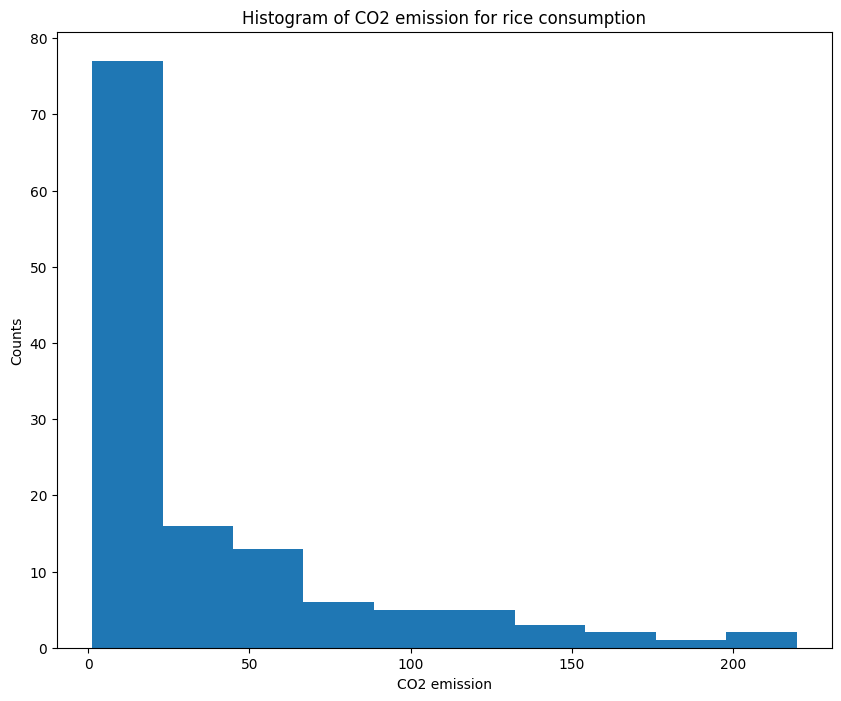

In [10]:
#Q-4)Plot the histogram of co2_emission for rice
print ('Q-4)Plot the histogram of co2_emission for rice')

plt.hist(rice_consumption['co2_emission'])
plt.title('Histogram of CO2 emission for rice consumption')
plt.xlabel('CO2 emission')
plt.ylabel('Counts') # not sure if this is correct?
plt.show()


In [11]:

#Q-5) Calculate mean and median of co2_emission with .agg()
print ('Q-5) Calculate mean and median of co2_emission with .agg()')

rice_co2_stats = rice_consumption['co2_emission'].agg(['mean', 'median'])
print('Mean CO2 emission:', rice_co2_stats['mean'])
print('Median CO2 emission:', rice_co2_stats['median'])
print ('_____________________________________________________________________')


Q-5) Calculate mean and median of co2_emission with .agg()
Mean CO2 emission: 37.59161538461538
Median CO2 emission: 15.2
_____________________________________________________________________


In [12]:

#Q-6) Calculate the quintiles of co2_emission
print ('Q-6) Calculate the quintiles of co2_emission')
print(np.quantile(food_consumption['co2_emission'], np.linspace(0, 1, 6)))

print ('_____________________________________________________________________')


Q-6) Calculate the quintiles of co2_emission
[   0.       3.54    11.026   25.59    99.978 1712.   ]
_____________________________________________________________________


In [13]:

#Q-7) Calculate the variance and standard deviation of co2_emission for food_categories
print ('Q-7) Calculate the variance and standard deviation of co2_emission for food_categories')

co2_stats = food_consumption.groupby('food_category')['co2_emission'].agg(['var', 'std'])
print(co2_stats)

print ('_____________________________________________________________________')



Q-7) Calculate the variance and standard deviation of co2_emission for food_categories
                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570
_____________________________________________________________________


Q-8) Create histogram of co2_emission for food_category 'beef'


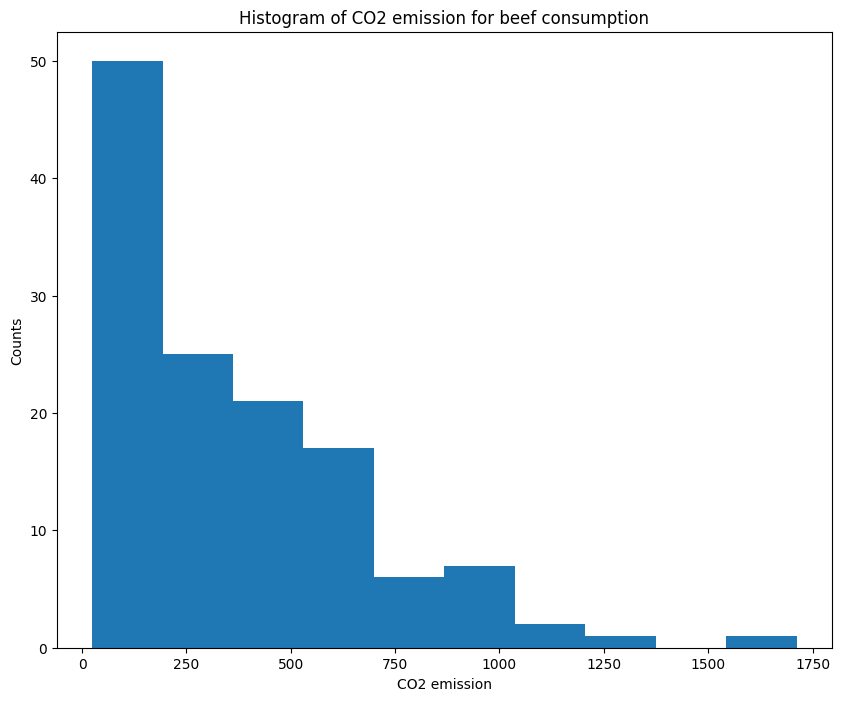

In [14]:

#Q-8) Create histogram of co2_emission for food_category 'beef'
print ("Q-8) Create histogram of co2_emission for food_category 'beef'")

# Filter for beef consumption
beef_consumption = food_consumption[food_consumption['food_category'] == 'beef']

plt.hist(beef_consumption['co2_emission'])
plt.title('Histogram of CO2 emission for beef consumption')
plt.xlabel('CO2 emission')
plt.ylabel('Counts')
plt.show()


In [15]:

print ('_____________________________________________________________________')

emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

print(emissions_by_country)

print ('_____________________________________________________________________')

q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country > upper) | (emissions_by_country < lower)]
print(outliers)



_____________________________________________________________________
country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
              ...   
Uruguay      1634.91
Venezuela    1104.10
Vietnam       641.51
Zambia        225.30
Zimbabwe      350.33
Name: co2_emission, Length: 130, dtype: float64
_____________________________________________________________________
country
Argentina    2172.4
Name: co2_emission, dtype: float64
